Edie Miglio

email: edie.miglio@polimi.it

Subject for the emails: NAML2023

# Introduction to Python

## Exceptions

In Python errors are managed with a special language construct called "Exceptions". When errors occur exceptions can be raised, which interrupts the normal program flow and fallback to somewhere else in the code where the closest try-except statement is defined.

To generate an exception we can use the `raise` statement, which takes an argument that must be an instance of the class `BaseException` or a class derived from it.

In [ ]:
raise Exception("description of the error")

A typical use of exceptions is to abort functions when some error condition occurs, for example:

    def my_function(arguments):

        if not verify(arguments):
            raise Exception("Invalid arguments")

        # rest of the code goes here

To gracefully catch errors that are generated by functions and class methods, or by the Python interpreter itself, use the `try` and  `except` statements:

    try:
        # normal code goes here
    except:
        # code for error handling goes here
        # this code is not executed unless the code
        # above generated an error

For example:

In [ ]:
print(test)

NameError: ignored

In [ ]:
try:
    print("test")
    # generate an error: the variable test is not defined
    print(test)
except:
    print("Caught an exception: variable not defined")

test
Caught an exception: variable not defined


To get information about the error, we can access the `Exception` class instance that describes the exception by using for example:

    except Exception as e:

In [ ]:
try:
    print("test")
    # generate an error: the variable test is not defined
    print(test)
except Exception as e:
    print("Caught an exception:" + str(e))

test
Caught an exception:name 'test' is not defined


In [ ]:
def divide(x, y):
    try:
        result = x // y
        print("The answer is :", result)
    #except ZeroDivisionError:
    #    print("Sorry ! Cannot divide by zero ")
    except Exception as e:
         print("Caught an exception:" + str(e))

divide(10, 4)

The answer is : 2


In [ ]:
divide(10,0)

Caught an exception:integer division or modulo by zero


You can find the list of exceptions at https://docs.python.org/3/library/exceptions.html

**Exercise.** Write a Python function for computing the factorial of a given integer number. Remember that the factorial is defined only for positive integer number and that the factorial of 0 is 1. Use the `raise` command to create exception and then use `try` and `except` to manage the exception.

In [ ]:
def factorial(n):
    if not isinstance(n,int):
        raise RuntimeError('The factorial is defined only for integers!')
    elif n<0:
        raise RuntimeError('The factorial is defined only for positive or null integers!')
    elif n==0:
        return 1
    else:
        return n*factorial(n-1)

In [ ]:
try:
    print(factorial(0))
except Exception as e:
    print("Error:",e)

1


In [ ]:
for i in range(10,-5,-1):
  print(factorial(i))

3628800
362880
40320
5040
720
120
24
6
2
1
1


RuntimeError: ignored

## Project 15: Constrained optimization

**Example 1.** Minimize the function
$$
f(x,y,z)=-(xy+yz),
$$
subject to the constraints
$$
x+2y=6, \\
x-3z=0.
$$

In [ ]:
import numpy as np
from scipy import optimize

In [ ]:
def f(x):
    return -(x[0]*x[1] + x[1]*x[2])

In [ ]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0] + 2*x[1] - 6, x[0] - 3*x[2]])})

In [ ]:
help(optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

In [ ]:
x0 = np.array([-10,20,50])
res = optimize.minimize(f, x0, constraints=cons)

In [ ]:
res

     fun: -6.0
     jac: array([-1.5, -4. , -1.5])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([2.99999999, 1.50000001, 1.        ])

In [ ]:
res.fun

In [ ]:
res.x

**Example 2.** Find the minimum of the following quadratic function on $\mathbb{R}^2$:
$$
F({\bf x})={\bf x}^T A {\bf x}+{\bf b}^T {\bf x}+c,
$$
where
$$
A=
\left[
\begin{array}{cc}
13 & 5 \\
5 & 7
\end{array}
\right],
\quad
{\bf b}=
\left[
\begin{array}{c}
1\\
1
\end{array}
\right],
\quad
c=2.
$$
Under the constraints:
$$
g({\bf x})=2x_1-5x_2=2, \qquad h({\bf x})=x_1+x_2=1.
$$


In [ ]:
A = np.array([
    [13,5],
    [5,7]
])
b = np.array([1,1]).reshape(-1,1)
c = 2

In [ ]:
b1 = np.array([1,1])
print(b1)
print(np.shape(b1))
print(b1[0])

[1 1]
(2,)
1


In [ ]:
b = np.array([1,1]).reshape(-1,1)
print(b)
print(np.shape(b))
print(b[0,0])

[[1]
 [1]]
(2, 1)
1


In [ ]:
f = lambda x, A, b, c: x.T @ A @ x + b.T @ x+c

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: 2*x[0] - 5*x[1] - 2},
        {'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1})

res = optimize.minimize(f, [0,0], constraints=cons, args=(A, b, c))
res

     fun: array([16.])
     jac: array([26.99999996, 11.00000024])
 message: 'Optimization terminated successfully'
    nfev: 11
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.00000000e+00, 3.41607086e-16])

In [ ]:
res = optimize.minimize(f, [0,0], args=(A, b, c))
res

      fun: 1.9621212121212124
 hess_inv: array([[ 0.33666667, -0.46333333],
       [-0.46333333,  0.73666665]])
      jac: array([7.45058060e-08, 4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([-0.01515152, -0.06060606])

In [ ]:
xx = res.x
xx=np.array([1,1]).reshape(1,-1)
xx

array([[1, 1]])

In [ ]:
A

array([[13,  5],
       [ 5,  7]])

In [ ]:
xx@A

array([[18, 12]])

**Example 3.** Find the minimum of the function $f(x)=x^2-2x$ subject to the constraint $x-2 \geq 0$

In [ ]:
help(np.poly1d)

Help on class poly1d in module numpy:

class poly1d(builtins.object)
 |  poly1d(c_or_r, r=False, variable=None)
 |  
 |  A one-dimensional polynomial class.
 |  
 |  .. note::
 |     This forms part of the old polynomial API. Since version 1.4, the
 |     new polynomial API defined in `numpy.polynomial` is preferred.
 |     A summary of the differences can be found in the
 |     :doc:`transition guide </reference/routines.polynomials>`.
 |  
 |  A convenience class, used to encapsulate "natural" operations on
 |  polynomials so that said operations may take on their customary
 |  form in code (see Examples).
 |  
 |  Parameters
 |  ----------
 |  c_or_r : array_like
 |      The polynomial's coefficients, in decreasing powers, or if
 |      the value of the second parameter is True, the polynomial's
 |      roots (values where the polynomial evaluates to 0).  For example,
 |      ``poly1d([1, 2, 3])`` returns an object that represents
 |      :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2

In [ ]:
import numpy as np
from scipy import optimize
objective = np.poly1d([1.0, -2.0, 0.0])
cons = ({'type': 'ineq','fun' : lambda x: np.array([x[0] - 1])})
results = optimize.minimize(objective,x0=3.0,constraints = cons, options = {'disp':True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: [-1.]
            Iterations: 2
            Function evaluations: 4
            Gradient evaluations: 2


In [ ]:
results

     fun: array([-1.])
     jac: array([1.49011612e-08])
 message: 'Optimization terminated successfully'
    nfev: 4
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.])

## Project 16: Monte Carlo integration

**Exercise.** Suppose you want to compute
$$
I=\int_a^b g(x)dx.
$$
The idea is to replace the estimate of the integral by the following average
$$
\bar{I}_n = \frac{1}{n} \sum_{i=1}^n I_i=\frac{b-a}{n} \sum_{i=1}^n g(a+(b-a)U_i),
$$
where the $U's$ are uniform random numbers between $0$ and $1$.

In [ ]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

In [ ]:
help(np.random.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    .. note::
        New code should use the ``uniform`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than or equal to high.  The default value is 1.0.
    size 

In [ ]:
help(np.random.shuffle)

Help on built-in function shuffle:

shuffle(...) method of numpy.random.mtrand.RandomState instance
    shuffle(x)
    
    Modify a sequence in-place by shuffling its contents.
    
    This function only shuffles the array along the first axis of a
    multi-dimensional array. The order of sub-arrays is changed but
    their contents remains the same.
    
    .. note::
        New code should use the ``shuffle`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    x : ndarray or MutableSequence
        The array, list or mutable sequence to be shuffled.
    
    Returns
    -------
    None
    
    See Also
    --------
    Generator.shuffle: which should be used for new code.
    
    Examples
    --------
    >>> arr = np.arange(10)
    >>> np.random.shuffle(arr)
    >>> arr
    [1 7 5 2 9 4 3 6 0 8] # random
    
    Multi-dimensional arrays are only shuffled along the first axis:
    
    >>> ar

In [ ]:
def monte_carlo_uniform(func, a=0, b=1, n=1000):

  subsets = np.arange(0,n+1,n/10)
  steps = n/10
  u = np.zeros(n)
  for i in range(10):
    start = int(subsets[i])
    end = int(subsets[i+1])
    u[start:end]= np.random.uniform(low=i/10, high=(i+1)/10, size=end-start)
  np.random.shuffle(u)
  #plt.hist(u)
  #u = np.random.uniform(size=n)
  u_func = func(a+(b-a)*u)
  s = ((b-a)/n)*u_func.sum()

  return s

In [ ]:
def f(x):
  return(15*x**3+21*x**2+41*x+3)**(1/4)*(np.exp(-0.5*x))

In [ ]:
integral = monte_carlo_uniform(f,a=0,b=4,n=100)
print(integral)

5.759429525596113


In [ ]:
N = 1000
integral=np.zeros(N)
for i in range(N):
  integral[i] = monte_carlo_uniform(f,a=0,b=4,n=100)

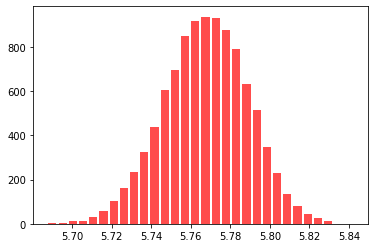

In [ ]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=integral, bins=30, color='red',
                            alpha=0.7, rwidth=0.8)

In [ ]:
from scipy import integrate
integrate.quad(f,0,4)

(5.767433490695931, 5.492382344683848e-10)

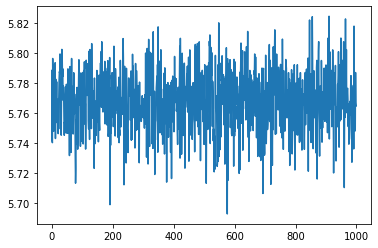

In [ ]:
plt.plot(integral)

In [ ]:
%%timeit -n100 -r100
i = monte_carlo_uniform(f,0,4,500)

199 µs ± 24.2 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [ ]:
from scipy import integrate

In [ ]:
%%timeit -n100 -r100
integrate.quad(f,0,4)

274 µs ± 27.5 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


## Project 19: Black-Scholes option pricing with Monte Carlo on Python

The aim is to explore different methods for the valuation of options within the framework of the Black-Scholes pricing model. In particular, we will rely on Monte Carlo methods for the pricing of european call options, and compare the results with those obtained through the exact Black-Scholes solution.

As a minimal introduction, the Black-Scholes model states that the asset prices as a function of time, $S(t)$, follows a geometric brownian motion:
$$
dS = S \mu dt + S \sigma dz\,.
$$

Let then have an option $f$, which will be a function of $S$ and $t$. Then, the process followed by this option will be described by:
$$
df = \left( \frac{\partial f}{\partial S}\mu S + \frac{\partial f}{\partial t} + \frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2}f}{\partial S^{2}}\right)dt + \frac{\partial f}{\partial S}\sigma S dz\,.
$$

Let us consider the following portfolio $\Pi$, composed of the option $f$ and a certain amount $\Delta$ of the underlying $S$:
$$
\Pi = f + \Delta S\,.
$$
Then, this portfolio will follow the process:
$$
d\Pi = - df +\frac{\partial f}{\partial S} dS = \left( -\frac{\partial f}{\partial t} - \frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2} f}{\partial S^{2}} \right)dt\,,
$$
We we have set:
$$
\Delta = \partial f / \partial S\,.
$$
We notice that, in the equation for $d\Pi$, the stochastic part of the process $dz$ is no longer present. This eliminates risk from the portfolio, which will therefore earn a risk-free rate $r$:
$$
d\Pi = r \Pi dt\,.
$$
Combining these equations for $d\Pi$, we end up with:
$$
\frac{\partial f}{ \partial t} + r\,S\frac{\partial f}{\partial S} +\frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2}f}{\partial S^{2}} = r\,f\,,
$$
which is the Black-Scholes equation.

The solution of the Black-Scholes equation for an european call option $C(S,t)$, given the maturity $T$ and strike price $X$ is given by:
$$
C(S,t) = S\, N(d_{1}) - X\,e^{-r(T-t)}N(d_{2})\,,
$$
where:
$$
d_{1} = \frac{\ln(S/X) + \left(r + \frac{\sigma^{2}}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}\,,
$$
$$
d_{2} = \frac{\ln(S/X) + \left(r - \frac{\sigma^{2}}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}\,,
$$
and where $N(d)$ is the cumulative normal distribution:
$$
N(d)= \frac{1}{\sqrt{2\pi}}\int_{-d}^{\infty} dx\; e^{-x^{2}/2}\,.
$$

# Exact Solution

Let us first focus on the exact solution for the price of the call option $C(S,t)$.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import numpy.random as npr

We define the exact solution directly:

In [ ]:
def BS_Call_Exact(S,X,r,sigma,T,t):

    d1 = (np.log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*np.sqrt((T-t)))
    d2 = d1-sigma*np.sqrt((T-t))

    ST = S*stats.norm.cdf(d1) - X*np.exp(-r*(T-t))*stats.norm.cdf(d2)

    return ST

We plot some solutions $C$ as function of $t$. We choose $S = 100$ and use $X=95,98,100,105$. In the remaining of this notebook, we will always set $T = 1$ $r = 0.06$, $\sigma = 0.3$.

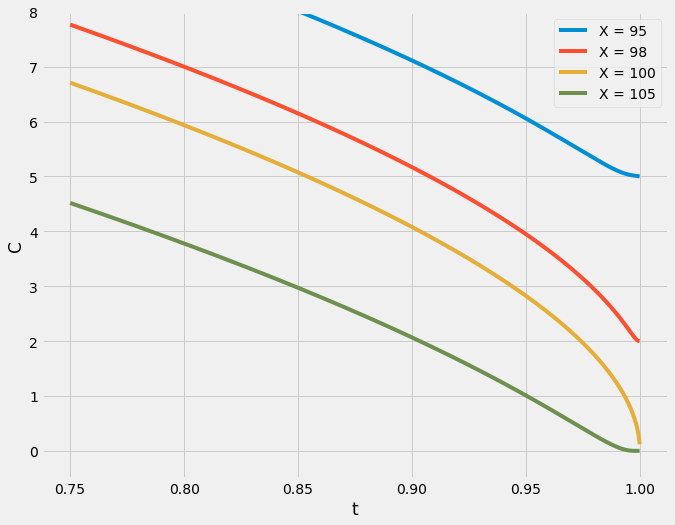

In [ ]:
t = np.arange(0.75, 1.0, 0.0001)

plt.figure(figsize = (10,8))
plt.plot(t,BS_Call_Exact(100,95,0.06,0.3,1,t), label = 'X = 95')
plt.plot(t,BS_Call_Exact(100,98,0.06,0.3,1,t), label = 'X = 98')
plt.plot(t,BS_Call_Exact(100,100,0.06,0.3,1,t), label='X = 100')
plt.plot(t,BS_Call_Exact(100,105,0.06,0.3,1,t), label = 'X = 105')

plt.xlabel('t')
plt.ylabel('C')
plt.ylim(-0.5, 8)

plt.legend()
plt.show()

In particular, for $T-t = 0$, we have the standard funcion for the call option at maturity:

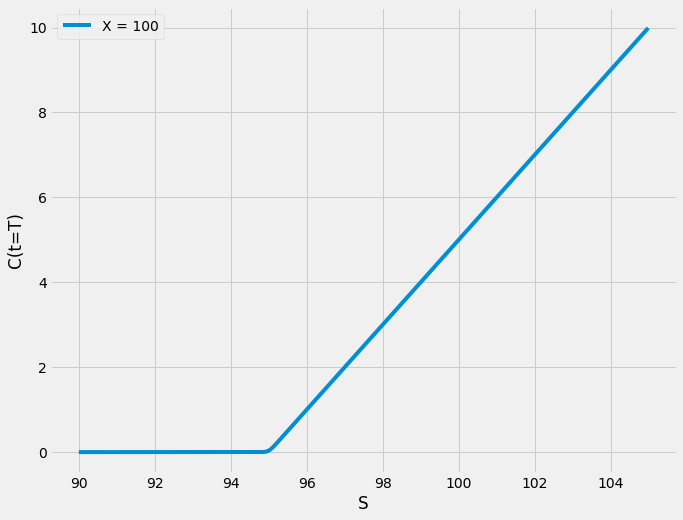

In [ ]:
s = np.arange(90, 105, 0.01)

plt.figure(figsize = (10,8))
plt.plot(s,BS_Call_Exact(s,95,0.06,0.3,1,0.99999), label = 'X = 100')

plt.xlabel('S')
plt.ylabel('C(t=T)')

plt.legend()
plt.show()

# Monte Carlo Method

An alternate way to compute the call option price is to use Monte Carlo methods. The starting point is taking the Brownian motion equation for the underlying stock $S(t)$:
$$
dS = S\,r dt +S\sigma dz\,,
$$
where we have set $\mu = r$, since we are working in a risk-free setting. This equation can be discretized by an Euler scheme. By doing this, we obtain the level of stock index $S_{T}$ at a future $T$ given a level $S_{t}$ as:
$$
S_{T} = S_{t}\exp\left(\left(r-\frac{1}{2}\sigma^{2}\right)(T-t) +\sigma \sqrt{(T-t)} \, z\right)\,,
$$
where $z$ is an stochastic variable following a normal distribution.

We can simulate the process for $S_{T}$ using the Monte Carlo method. As an example, we set $r=0.06$, $\sigma = 0.3$, $T-t = 1$, $S_{t} = 100 $. We make $I = 100000$ iterations and choose $M = 100$ intervals for the time interval discretization.

In [ ]:
r=0.06
sigma = 0.3
T = 1.0
S0 = 100

I = 100000
M = 100

dt = T/M

S = np.zeros((M+1, I))
S[0] = S0
for t in range(1,M+1):
    S[t] = S[t-1]*np.exp((r -0.5*sigma**2)*dt +sigma*np.sqrt(dt)*npr.standard_normal(I))


We notice that $S_{i}$ has a log-normal distribution:

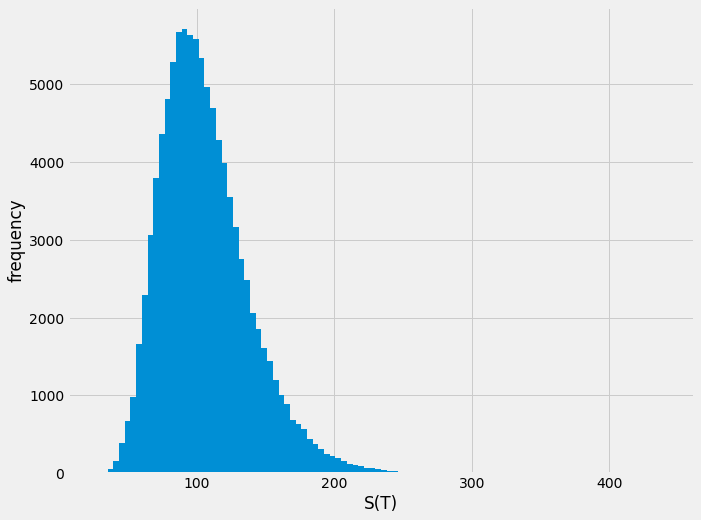

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(S[-1], bins=100)
plt.xlabel('S(T)')
plt.ylabel('frequency')
plt.show()

We also note that $S_{t}$ follows a geometric brownian motion:

In [ ]:
np.shape(S)

(101, 100000)

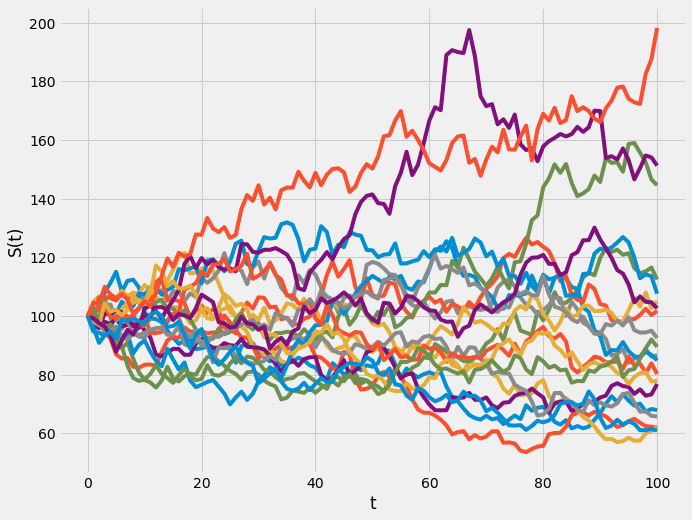

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(S[:, :20])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.show()

We now that, in the case of a call option, the payoff function at maturity $T$ is given by:
$$\
h(S_{T}) = \max \left( S_{T}-X,0\right)\,.
$$
Then, in the particular case of a risk-free setting, it can be shown that the call option price is given by:
$$
C(T)  = e^{-r(T-t)}\int_{-\infty}^{\infty}dS_{T}\,h(S_{T})\,q(S_{T})\,,
$$
where $q(S)$ is a probability density for the equivalent martingale process to $S_{t}$. This integral can actually be discretized, yielding:
$$
C(T) = e^{-r(T-t)}\frac{1}{I}\sum_{i = 1}^{I}h(S_{T}^{i})\,,
$$
where the sum is taken over a collection $S_{T}^{i}$ following a geometric brownian motion that can be generated by Monte Carlo simulation.

In [ ]:
def BS_Call_MC(S,X,r,sigma,T,t,I):

    data = np.zeros((I, 2))

    z = np.random.normal(0, 1, [1, I])

    #z = npr.standard_normal(I)

    ST = S*np.exp((T-t)*(r - 0.5*sigma**2)+sigma*np.sqrt(T-t)*z)

    data[:,1] = ST - X

    average = np.sum(np.amax(data, axis=1))/float(I)

    return np.exp(-r*(T-t))*average

We compare the Monte Carlo result for various values and see that there is good agreement:

In [ ]:
print('Monte Carlo:',BS_Call_MC(100,95,0.06,0.3,1,.999,100000))
print('Exact: ',BS_Call_Exact(100,95,0.06,0.3,1,.999))

Monte Carlo: 5.002385211914798
Exact:  5.005699833982007


In [ ]:
print('Monte Carlo:',BS_Call_MC(100,95,0.06,0.3,1,.75,100000))
print('Exact: ',BS_Call_Exact(100,95,0.06,0.3,1,.75))

Monte Carlo: 9.546386875899387
Exact:  9.548802012535894


We can plot how the value of the Monte Carlo call option converges to the exact value as the number of iterations increases:

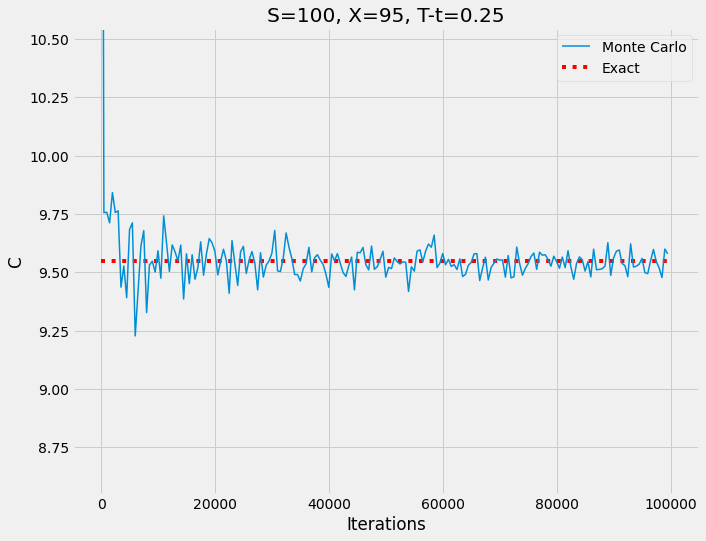

In [ ]:
df = pd.DataFrame(columns=['Iter','BSc'])

for i in range(1, 100000, 500):

    df = df.append({'Iter': i, 'BSc': BS_Call_MC(100,95,0.06,0.3,1,0.75,i)}, ignore_index=True)


plt.figure(figsize=(10,8))

plt.hlines(BS_Call_Exact(100,95,0.06,0.3,1,0.75),xmin=0,xmax= 100000,linestyle='dotted',colors='red',label = 'Exact')
plt.plot(df.set_index('Iter'),lw = 1.5, label = 'Monte Carlo')

plt.title('S=100, X=95, T-t=0.25')
plt.xlabel('Iterations')
plt.ylabel('C')
plt.ylim(BS_Call_Exact(100,95,0.06,0.3,1,0.75)-1,BS_Call_Exact(100,95,0.06,0.3,1,0.75)+1)
plt.legend()
plt.show()

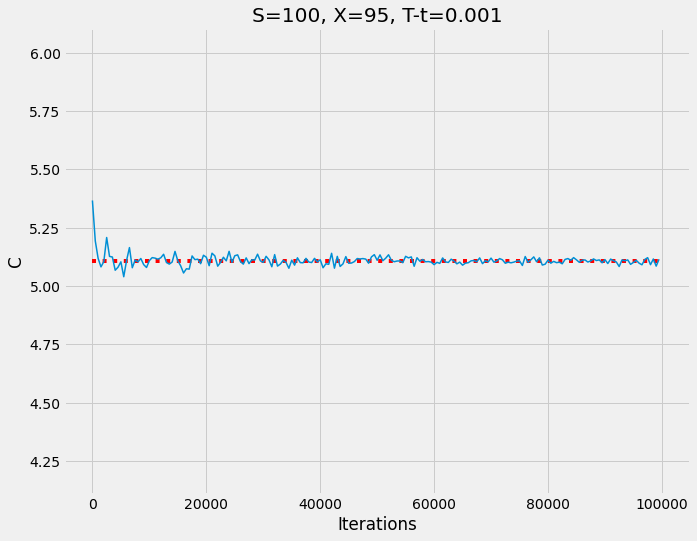

In [ ]:
df = pd.DataFrame(columns=['Iter','BSc'])

for i in range(1, 100000, 500):

    df = df.append({'Iter': i, 'BSc': BS_Call_MC(100,95,0.06,0.3,1,0.99,i)}, ignore_index=True)


plt.figure(figsize=(10,8))

plt.plot(df.set_index('Iter'),lw = 1.5)
plt.hlines(BS_Call_Exact(100,95,0.06,0.3,1,0.99),xmin=0,xmax= 100000,linestyle='dotted',colors='red')

plt.title('S=100, X=95, T-t=0.001')
plt.xlabel('Iterations')
plt.ylabel('C')
plt.ylim(BS_Call_Exact(100,95,0.06,0.3,1,0.99)-1,BS_Call_Exact(100,95,0.06,0.3,1,0.99)+1)

plt.show()

Finally, we plot the Monte Carlo call option as a function of time and compare it with the exact result, for the values $S =100$ and $X =95,\,98,\,100,\,105$.

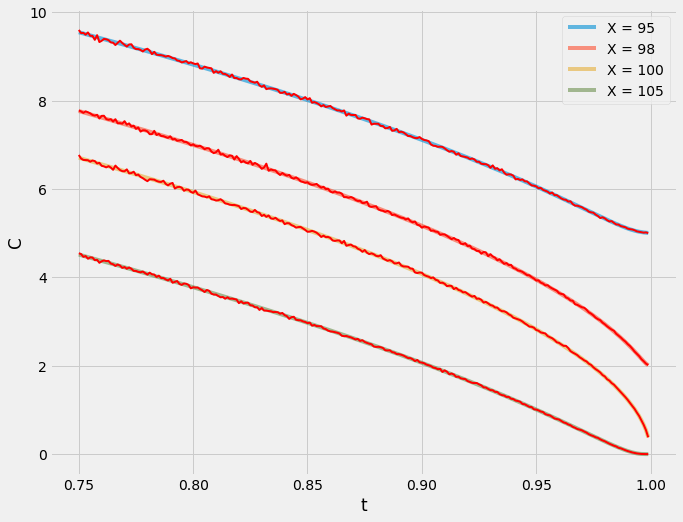

In [ ]:
df = pd.DataFrame(columns=['t','95','98','100','105'])
t = np.arange(0.75, 1.0, 0.001)

for i in t:

    df = df.append({'t': i, '95': BS_Call_MC(100,95,0.06,0.3,1,i,100000),'98': BS_Call_MC(100,98,0.06,0.3,1,i,100000),'100': BS_Call_MC(100,100,0.06,0.3,1,i,100000),'105': BS_Call_MC(100,105,0.06,0.3,1,i,100000)}, ignore_index=True)


plt.figure(figsize=(10,8))
plt.plot(t,BS_Call_Exact(100,95,0.06,0.3,1,t),alpha=0.6, label = 'X = 95')
plt.plot(t,BS_Call_Exact(100,98,0.06,0.3,1,t),alpha=0.6, label = 'X = 98')
plt.plot(t,BS_Call_Exact(100,100,0.06,0.3,1,t),alpha=0.6, label = 'X = 100')
plt.plot(t,BS_Call_Exact(100,105,0.06,0.3,1,t),alpha=0.6, label = 'X = 105')

plt.plot(df['t'],df['95'],lw=2,c='r')
plt.plot(df['t'],df['98'],lw=2,c='r')
plt.plot(df['t'],df['100'],lw=2,c='r')
plt.plot(df['t'],df['105'],lw=2,c='r')

plt.legend()
plt.xlabel('t')
plt.ylabel('C')

plt.show()